## This is the 2nd practical task of Sirius summer school "Applying AI for Med image analysis". 
Practical tasks take form of jupyter notebook with example code in the begging and some tasks in the end. Please, provide your solution in form of python code. Read hints, google a lot, don't hesitate to ask us directyl and most importatly - 
<span style="color:blue">have fun</span>.

**Topic**: Morphological operators

**To submit**: New version of the notebook, with your code. 

**Task**: This time you will have to implement two morphological operators (dilation and erosion) withouth using any high-level libraries. Your goal is to compare your results with standard implementation and hopefully achieve similar results. 

In [ ]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 1.2MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pydicom 
from matplotlib import pyplot as plt
file1 = pydicom.read_file("/content/drive/My Drive/Sirius 2020/data/aorta/1/I10.dicom")
img = file1.pixel_array

In [ ]:
from skimage import morphology as mh

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

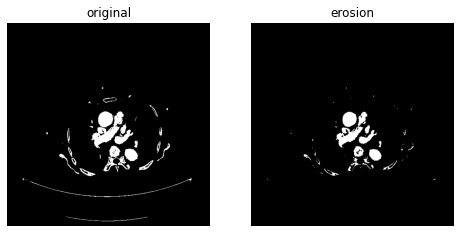

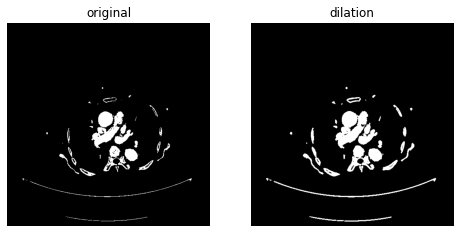

In [ ]:
binarized = img>1200 #some arbitrary thresholding 
plot_comparison(binarized,(mh.erosion(binarized)),"erosion")
plot_comparison(binarized,(mh.dilation(binarized)),"dilation")

In [ ]:
import numpy as np #The only library you allowed to use :D 

## **Task:**
- This time you will have to implement two morphological operators (dilation and erosion) withouth using any high-level libraries. Your goal is to compare your results with standard implementation and hopefully achieve similar results. 
- Given: two function signatures
- Do: Create your own version using only numpy library and compare them with skimage versions. You are **not** allowed to use opencv, skimage. If in doubt about some library - ask us directly


### Good luck, have fun. 
ps. you can google ideas, but please try to write your own code. 

In [ ]:
import numpy as np
kernel = np.array ([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]])

def my_dillation(image, selem):
        image_new = image.copy()

        vertical_window = image.shape[0] - selem.shape[0] 
        horizontal_window = image.shape[1] - selem.shape[1] 

        vertical_pos = 0
        while vertical_pos <= vertical_window:
            horizontal_pos = 0
            while horizontal_pos <= horizontal_window:
                dilation_flag = False
                for i in range(selem.shape[0]):      
                    for j in range(selem.shape[1]):  
                        if selem[i][j] == 1:         
                            if image[vertical_pos+i][horizontal_pos+j] == 1:  
                                dilation_flag = True
                                break
                    if dilation_flag:      
                        image_new[vertical_pos, horizontal_pos] = 1
                        break

                horizontal_pos += 1
            vertical_pos += 1
        return image_new

def my_erosion(image, selem):
        image_new=image.copy()

        vertical_window = image.shape[0] - selem.shape[0] 
        horizontal_window = image.shape[1] - selem.shape[1] 

        vertical_pos = 0
        while vertical_pos <= vertical_window:
            horizontal_pos = 0
            while horizontal_pos <= horizontal_window:
                erosion_flag = False
                for i in range(selem.shape[0]):      
                    for j in range(selem.shape[1]):  
                        if selem[i][j] == 1:         
                            if image[vertical_pos+i][horizontal_pos+j] == 0:  
                                erosion_flag = True
                                break
                    if erosion_flag:      
                        image_new[vertical_pos, horizontal_pos] = 0
                        break

                horizontal_pos += 1
            vertical_pos += 1
        return image_new
    

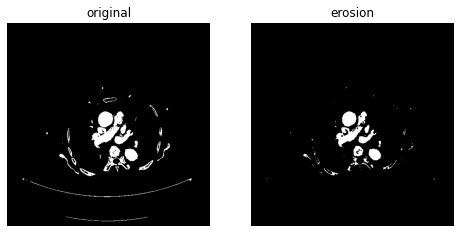

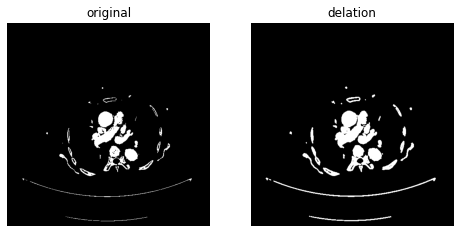

In [ ]:
plot_comparison(binarized, my_erosion(binarized, kernel), 'erosion')
plot_comparison(binarized, my_dillation(binarized, kernel), 'delation')